Import Libarary

In [2]:
import pandas as pd
import numpy as py
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Buka Data

In [3]:
df = pd.read_csv("C:/Users/iqbal/Downloads/CHALLANGE PLATINUM/train_preprocess.tsv.txt",encoding="latin1",sep='\t',header=None,names=["text","label"])

In [4]:
df

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
df.duplicated().sum()

67

Tokenization

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df["text"],df["label"],test_size=0.1)

In [8]:
cv = CountVectorizer()

In [9]:
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)

In [10]:
x_train

9542     suasana di sini sangat enak , makan di atas te...
3781     bbc indonesia - pilkada 2018 : partai demokrat...
4370     jadi begini nih rasanya cemburu , tidak enak b...
10235    salah satu restoran seafood terbaik di bandung...
3448     jika anda adalah pecinta makanan pedas , nasi ...
                               ...                        
3276     dengan beberapa cabang di kota besar dan revie...
2857     suku lampung anjing semua , setuju tidak kalau...
1945     restoran nya unik . satu saung terpisah agak j...
10314    aneka minuman segar ini menjadi pelengkap kuli...
9808     to the point saja : - salah satu tempat wajib ...
Name: text, Length: 9900, dtype: object

In [11]:
y_train

9542     positive
3781      neutral
4370     negative
10235    positive
3448     positive
           ...   
3276     negative
2857     negative
1945     positive
10314    positive
9808     positive
Name: label, Length: 9900, dtype: object

In [12]:
x_test

10990    datang ke sini sore hari pakai baju agak tebal...
6010     restoran bergaya peranakan . zaman dahulu . ad...
9018     ikuti terus twitter dan facebook page samsung ...
9189     sadar dirilah wahai monyet-monyet papua yang t...
3955     kecewa saya dengan indosat , sampai kesal , ma...
                               ...                        
9897     pemandangan bandung malam luarbiasa makanan ny...
1288     suasana nya sangat-sangat menyenangkan , dingi...
9111     pikir beberapa tempat untuk makan malam romant...
4744            ini indosat masih belum bisa aku mau marah
1630     bagi yang ingin makan tidak terlalu kenyang da...
Name: text, Length: 1100, dtype: object

In [13]:
y_train

9542     positive
3781      neutral
4370     negative
10235    positive
3448     positive
           ...   
3276     negative
2857     negative
1945     positive
10314    positive
9808     positive
Name: label, Length: 9900, dtype: object

In [14]:
x_train_cv

<9900x16347 sparse matrix of type '<class 'numpy.int64'>'
	with 242712 stored elements in Compressed Sparse Row format>

In [15]:
x_test_cv

<1100x16347 sparse matrix of type '<class 'numpy.int64'>'
	with 25450 stored elements in Compressed Sparse Row format>

Modelling

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

In [17]:
lr=LogisticRegression()

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Atur nilai max_iter sesuai kebutuhan

In [19]:
lr.fit(X=x_train_cv, y=y_train)

C:\Users\iqbal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
lr.score(X=x_train_cv, y=y_train)

0.9815151515151516

Testing

In [21]:
y_pred=lr.predict(X=x_test_cv)

In [22]:
accuracy_score(y_true=y_test, y_pred = y_pred)

0.8818181818181818

In [23]:
# Ganti 'nama_file.tsv' dengan nama file TSV yang sebenarnya
nama_file = 'train_preprocess.tsv'

# Membaca file TSV dan menyimpannya dalam sebuah DataFrame
df = pd.read_csv("C:/Users/iqbal/Downloads/CHALLANGE PLATINUM/train_preprocess.tsv.txt",encoding="latin1",sep='\t',header=None,names=["text","label"])


In [24]:
print(df.columns)

Index(['text', 'label'], dtype='object')


In [25]:
# Ganti 1000 dengan jumlah sampel yang Anda inginkan
sample_data = df.sample(n=1000, random_state=42)

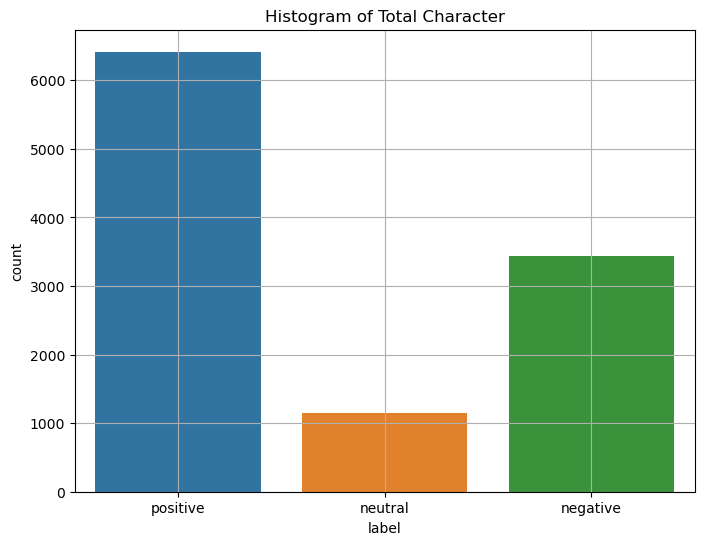

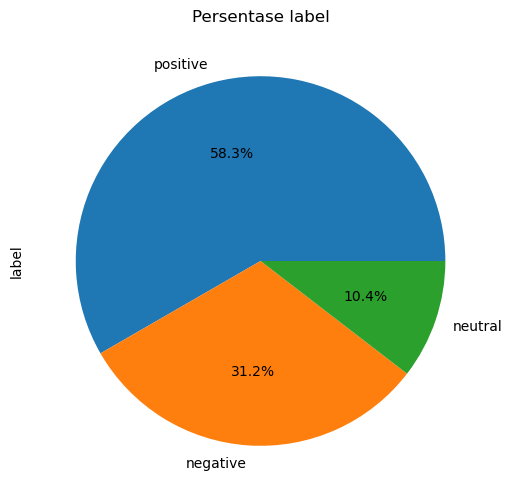

In [26]:
# Visualisasi distribusi label dengan diagram batang
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Histogram of Total Character')
plt.grid(True)
plt.show()

# Visualisasi distribusi label dengan diagram pie
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase label')
plt.show()


In [27]:
print(df.head())

                                                text     label
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral
2  lokasi strategis di jalan sumatera bandung . t...  positive
3  betapa bahagia nya diri ini saat unboxing pake...  positive
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative


In [28]:
#Menghitung jumlah kata dalam kolom teks
df['Word_Count'] = df['text'].apply(lambda x: len(str(x).split()))
print(df[['text', 'Word_Count']].head())

                                                text  Word_Count
0  warung ini dimiliki oleh pengusaha pabrik tahu...          66
1  mohon ulama lurus dan k212 mmbri hujjah partai...          17
2  lokasi strategis di jalan sumatera bandung . t...          33
3  betapa bahagia nya diri ini saat unboxing pake...          17
4  duh . jadi mahasiswa jangan sombong dong . kas...          38


In [72]:
df['Total_Characters'] = df['text'].apply(lambda x: len(str(x)))
print(df[['text', 'Total_Characters']].head())

                                                text  Total_Characters
0  warung ini dimiliki oleh pengusaha pabrik tahu...               404
1  mohon ulama lurus dan k212 mmbri hujjah partai...               102
2  lokasi strategis di jalan sumatera bandung . t...               184
3  betapa bahagia nya diri ini saat unboxing pake...                93
4  duh . jadi mahasiswa jangan sombong dong . kas...               214


In [73]:
# Jika menggunakan DataFrame
# Tokenisasi teks dalam DataFrame (misalnya, kolom 'Text')
df['Tokenized_Text'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

In [74]:
# Jika menggunakan DataFrame
# Hitung total kata pada kolom 'Tokenized_Text'
df['Total_Words'] = df['Tokenized_Text'].apply(lambda x: len(x))
total_words = df['Total_Words'].sum()

In [75]:
print(total_words)

362470


In [76]:
df['Total_Characters'] = df['Tokenized_Text'].apply(lambda x: sum(len(word) for word in x))
total_characters = df['Total_Characters'].sum()

In [58]:
# plt.figure(figsize=(8, 6))
# plt.hist(df['Total_Words'], bins=10, edgecolor='k', color='skyblue')
# plt.xlabel('Total Kata')
# plt.ylabel('Frekuensi')
# plt.title('Histogram Jumlah Kata dalam Teks')
# plt.grid(True)
# plt.show()

In [87]:
# # Fungsi untuk menghitung jumlah karakter dalam teks
# def count_characters(text):
#     return len(text)

# # Fungsi untuk menghitung jumlah kata dalam teks
# def count_words(text):
#     tokenized_text = nltk.word_tokenize(text)
#     return len(tokenized_text)

# Fungsi untuk menghitung total karakter dalam kolom 'Tokenized_Text'
def count_characters(text_list):
    return sum(len(word) for word in text_list)

# Hitung total karakter dalam kolom 'Tokenized_Text'
df['Total_Characters'] = df['Tokenized_Text'].apply(count_characters)

# Hitung mean dari kolom 'Total_Characters'
mean_total_characters = df['Total_Characters'].mean()

In [91]:
print(df)

                                                    text     label  \
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive   
1      mohon ulama lurus dan k212 mmbri hujjah partai...   neutral   
2      lokasi strategis di jalan sumatera bandung . t...  positive   
3      betapa bahagia nya diri ini saat unboxing pake...  positive   
4      duh . jadi mahasiswa jangan sombong dong . kas...  negative   
...                                                  ...       ...   
10995                                       tidak kecewa  positive   
10996  enak rasa masakan nya apalagi kepiting yang me...  positive   
10997        hormati partai-partai yang telah berkoalisi   neutral   
10998  pagi pagi di tol pasteur sudah macet parah , b...  negative   
10999  meskipun sering belanja ke yogya di riau junct...  positive   

       Word_Count                                     Tokenized_Text  \
0              66  [warung, ini, dimiliki, oleh, pengusaha, pabri...   
1              

In [92]:
print("Mean Total Characters:", mean_total_characters)

Mean Total Characters: 156.96563636363638


In [79]:
# Menghitung jumlah karakter dan kata untuk setiap baris teks
df['Total_Characters'] = df['text'].apply(count_characters)
df['Total_Words'] = df['text'].apply(count_words)

In [80]:
print(df)

                                                    text     label  \
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive   
1      mohon ulama lurus dan k212 mmbri hujjah partai...   neutral   
2      lokasi strategis di jalan sumatera bandung . t...  positive   
3      betapa bahagia nya diri ini saat unboxing pake...  positive   
4      duh . jadi mahasiswa jangan sombong dong . kas...  negative   
...                                                  ...       ...   
10995                                       tidak kecewa  positive   
10996  enak rasa masakan nya apalagi kepiting yang me...  positive   
10997        hormati partai-partai yang telah berkoalisi   neutral   
10998  pagi pagi di tol pasteur sudah macet parah , b...  negative   
10999  meskipun sering belanja ke yogya di riau junct...  positive   

       Word_Count                                     Tokenized_Text  \
0              66  [warung, ini, dimiliki, oleh, pengusaha, pabri...   
1              

In [81]:
total_words = df['Total_Words'].sum()
print("Total kata:", total_words)

Total kata: 362470


In [82]:
total_characters = df['Total_Characters'].sum()
print("Total karakter:", total_characters)


Total karakter: 2077866


In [83]:
# Hitung total karakter dan total kata dalam tiap teks
total_characters = x_train.apply(len)
total_words = x_train.apply(lambda x: len(x.split()))

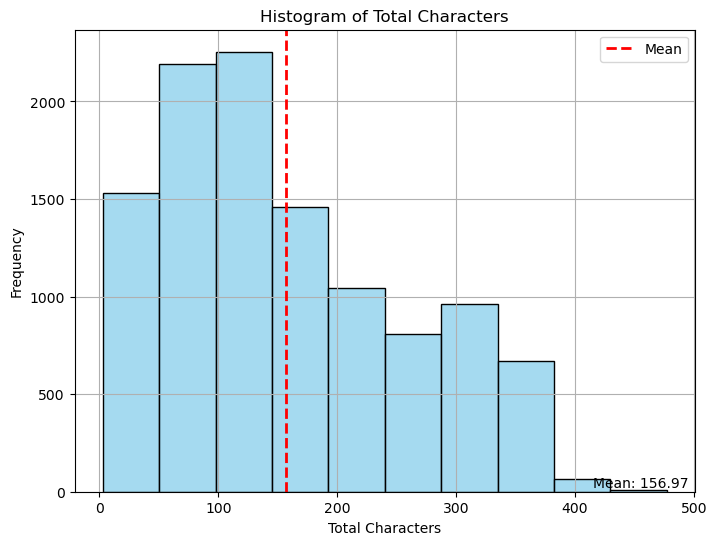

In [114]:
# Hitung nilai rata-rata (mean)
mean_value = df['Total_Characters'].mean()

# Membuat histogram menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_Characters'], bins=10, color='skyblue', kde=False)
plt.xlabel('Total Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Total Characters')
plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean') # Menambahkan garis rata-rata (mean) pada histogram
plt.text(plt.gca().get_xlim()[1] - 5, plt.gca().get_ylim()[0] + 5, f'Mean: {mean_value:.2f}', color='black', ha='right', va='bottom')
plt.legend()
plt.grid(True)
plt.show()

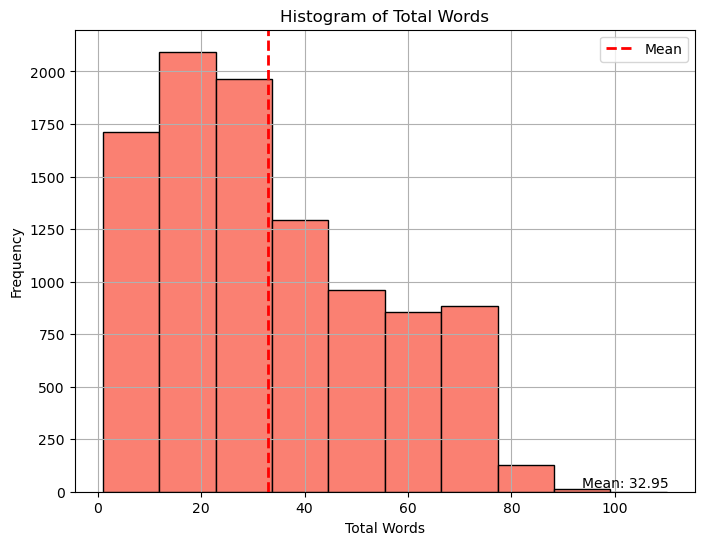

In [90]:
# Membuat Histogram of Total Words
plt.figure(figsize=(8, 6))
plt.hist(total_words, bins=10, color='salmon', edgecolor='black')
plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')  # Menambahkan garis rata-rata (mean)
plt.xlabel('Total Words')
plt.ylabel('Frequency')
plt.title('Histogram of Total Words')
plt.text(plt.gca().get_xlim()[1] - 5, plt.gca().get_ylim()[0] + 5, f'Mean: {mean_value:.2f}', color='black', ha='right', va='bottom') 
plt.legend()  # Menampilkan label garis rata-rata (mean) pada legenda
plt.grid(True)
plt.show()

In [77]:
df.describe()

,Word_Count,Total_Words,Total_Characters
count,11000.000000,11000.000000,11000.000000
mean,32.931273,32.951818,156.965636
std,21.181529,21.194179,100.122860
min,1.000000,1.000000,3.000000
25%,16.000000,16.000000,75.000000
50%,28.000000,28.000000,133.000000
75%,48.000000,48.000000,228.000000
max,110.000000,110.000000,477.000000


In [122]:
# Menghitung total kata dari label positif (positive labels)
positive_df = df[df['label'] == 'positive'].copy()  # Gunakan copy() untuk membuat salinan dari DataFrame 'df'
positive_df['Total_Words'] = positive_df['text'].apply(count_words)

In [123]:
# Menampilkan DataFrame dengan total kata pada label positif
print(positive_df[['text', 'Total_Words']])

                                                    text  Total_Words
0      warung ini dimiliki oleh pengusaha pabrik tahu...           66
2      lokasi strategis di jalan sumatera bandung . t...           33
3      betapa bahagia nya diri ini saat unboxing pake...           17
5      makanan beragam , harga makanan di food stall ...           28
7      tempat unik , bagus buat foto , makanan enak ,...           42
...                                                  ...          ...
10992  kalau memang jala nya sudah begitu terima saja...           10
10994                                        tidak bosan            2
10995                                       tidak kecewa            2
10996  enak rasa masakan nya apalagi kepiting yang me...           26
10999  meskipun sering belanja ke yogya di riau junct...           68

[6416 rows x 2 columns]


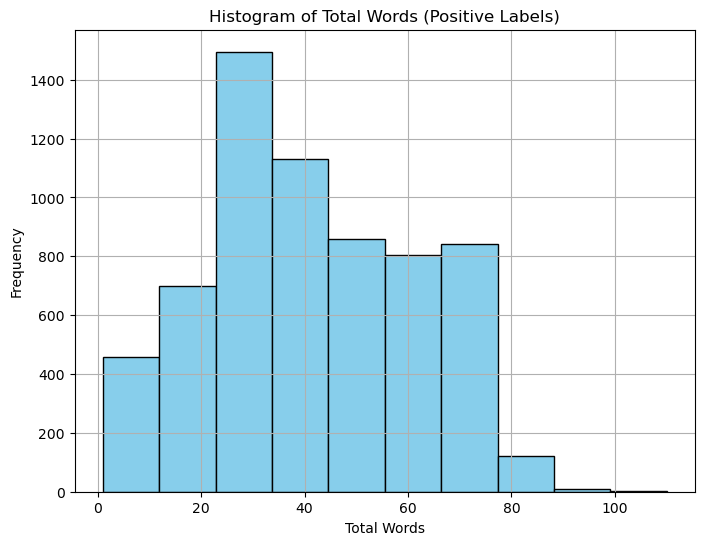

In [125]:
# Membuat histogram menggunakan Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(positive_df['Total_Words'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Total Words')
plt.ylabel('Frequency')
plt.title('Histogram of Total Words (Positive Labels)')

plt.grid(True)
plt.show()

In [126]:
negative_df = df[df['label'] == 'negative'].copy()  # Gunakan copy() untuk membuat salinan dari DataFrame 'df'
negative_df['Total_Words'] = negative_df['text'].apply(count_words)

In [130]:
# Menampilkan DataFrame dengan total kata pada label negative
print(negative_df[['text', 'Total_Words']])

                                                    text  Total_Words
4      duh . jadi mahasiswa jangan sombong dong . kas...           38
6      pakai kartu kredit bca tidak untung malah rugi...            9
10     simcard indosat inaktiv gara-gara lupa isi pul...           19
11     sifat iri sering muncul pada orang orang yang ...           12
13     pengalaman bersama indosat hari ini , semoga t...           20
...                                                  ...          ...
10982  tolong dibaca pesan saya ! di dalam kotak hand...           19
10985  sumpah gue kecewa banget dengan sms , cuma tea...           24
10989  tadinya pengin mengantar teman dari kalau ke r...           49
10991                                dapat rom awal abad            4
10998  pagi pagi di tol pasteur sudah macet parah , b...           13

[3436 rows x 2 columns]


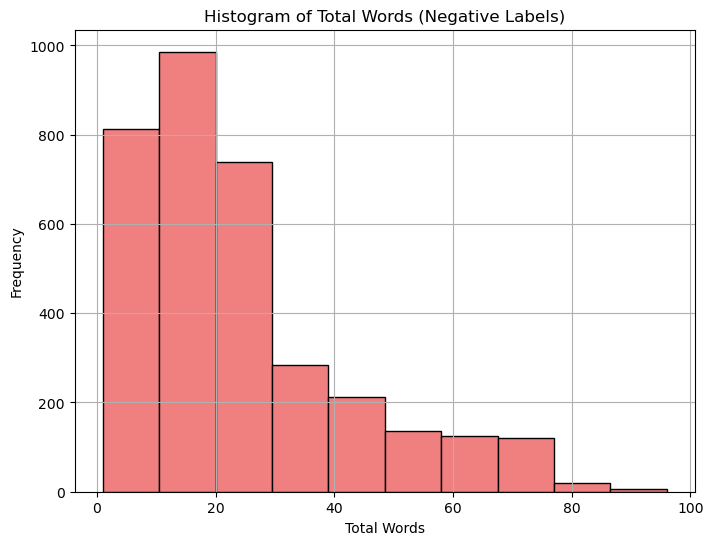

In [129]:
# Membuat histogram menggunakan Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(negative_df['Total_Words'], bins=10, color='lightcoral', edgecolor='black')
plt.xlabel('Total Words')
plt.ylabel('Frequency')
plt.title('Histogram of Total Words (Negative Labels)')

plt.grid(True)
plt.show()

In [131]:
# Menghitung total kata dari label netral (neutral labels)
neutral_df = df[df['label'] == 'neutral'].copy()  # Gunakan copy() untuk membuat salinan dari DataFrame 'df'
neutral_df['Total_Words'] = neutral_df['text'].apply(count_words)

In [132]:
# Menampilkan DataFrame dengan total kata pada label neutral
print(neutral_df[['text', 'Total_Words']])

                                                    text  Total_Words
1      mohon ulama lurus dan k212 mmbri hujjah partai...           17
16     setiap bumn dibentuk dengan uu bukan dibentuk ...           10
28     pdip sebut ridwan kamil menang karena berbaju ...            8
32     08:30 : kedatangan presiden ri dan rombongan d...           38
37     risma menjatuhkan pilihan nya pada gus ipul - ...           15
...                                                  ...          ...
10925  pkb benarkan charly setia band daftar jadi caw...           10
10967  pernah percaya kalau body lotion citra bikin b...           10
10969  bu susi marah , menteri luhut perbolehkan kapa...           17
10993  f - demokrat dorong upaya kemandirian energi n...            8
10997        hormati partai-partai yang telah berkoalisi            5

[1148 rows x 2 columns]


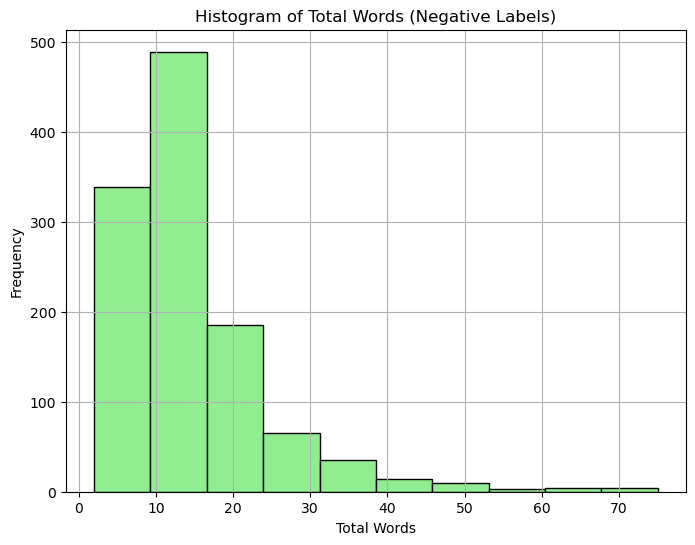

In [134]:
# Membuat histogram menggunakan Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(neutral_df['Total_Words'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Total Words')
plt.ylabel('Frequency')
plt.title('Histogram of Total Words (Negative Labels)')

plt.grid(True)
plt.show()